<a href="https://colab.research.google.com/github/theaayushg/Options-Trading-Simulator/blob/main/Options_Trading_Simulator_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Options Trading Simulator

In [ ]:
!pip install yfinance numpy matplotlib mplfinance plotly
"""First, we should install all necessary libraries"""
#yfinance: fetches historical stock price data.
#numpy: numerical computing in Python.
#matplotlib: creates static, animated, and interactive visualizations in Python.
#mplfinance: visualizing financial data in Python.
#plotly: creats interactive and dynamic visualizations in Python.
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import mplfinance as mpf
import plotly.graph_objects as go
from scipy.stats import norm

###Importing Trading Data

In [ ]:
#Define the desired stock symbol and time period
while True:
    try:
        symbol = input("What stock would you like to view? ")
        startDate = input("What start date would you like to view? ")
        endDate = input("What end date would you like to view? ")
        #ex: AAPL, META, AMZN, MSFT
        #ex: startDate = "2023-01-01", start_date = "2018-01-01"
        #ex: endDate = "2023-06-01", end_date = "2023-06-30"
        data = yf.download(symbol, start=startDate, end=endDate)
        break
    except Exception as e:
        pass

#fetch the historical data using given inputed stock and time period

What stock would you like to view? AAPL
What start date would you like to view? 2018-01-01
What end date would you like to view? 2023-06-30
[*********************100%***********************]  1 of 1 completed


###Building Options Trading Simulator

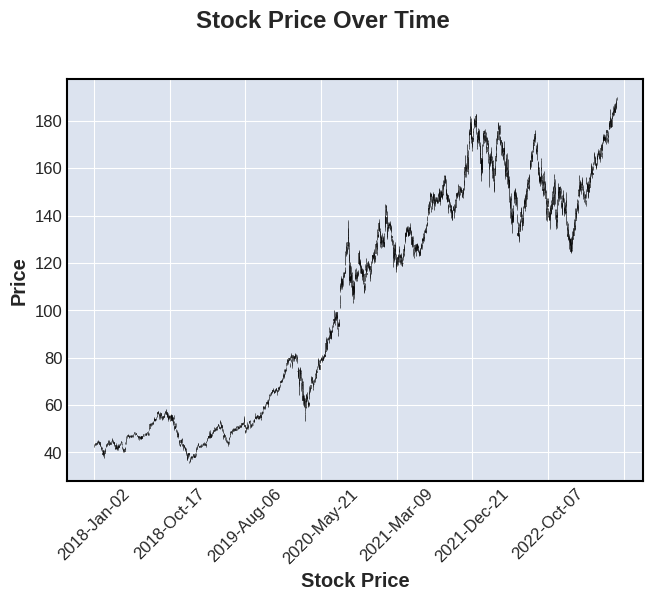

In [ ]:
class OptionsSimulator:
  def __init__(self, data):
    self.data = data #data is being initialized
  def plotStockPrice(self): #using data to plot graph of time vs price in candle stick view
    mpf.plot(self.data, type="candle", title="Stock Price Over Time", xlabel = "Stock Price", ylabel="Price", warn_too_much_data=2000, )

dataOptionsSimulator = OptionsSimulator(data)
dataOptionsSimulator.plotStockPrice()

###Visualizing Profit and Loss Scenarios

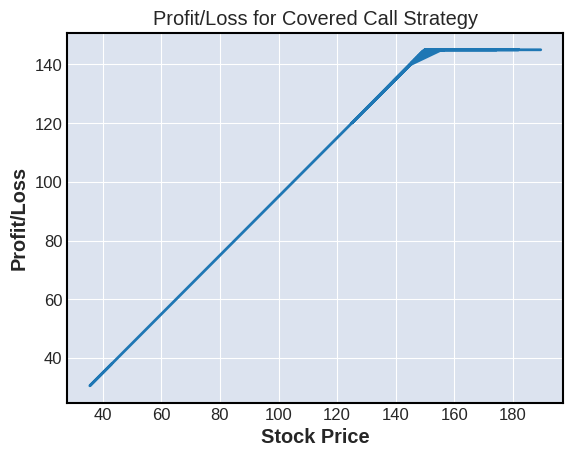

In [ ]:
"""Lets add the ability to visualize profit and loss scenarios"""
class OptionsSimulator:
  def __init__(self, data):
    self.data = data #data is being initialized
  def plotStockPrice(self): #using data to plot graph of time vs price in candle stick view
    mpf.plot(self.data, type="candle", title="Stock Price Over Time", xlabel = "Stock Price", ylabel="Price", )
  def plotProfitLoss(self, strategy):
    # Calculate the profit and loss for the covered call strategy
    stockPrice = self.data["Close"]
    callOptionPrice = strategy["call_option_price"]
    strikePrice = strategy["strike_price"]
    premium = strategy["premium"]
    profitLoss = np.where(stockPrice <= strikePrice, stockPrice - callOptionPrice + premium, strikePrice - callOptionPrice + premium)
    # plotting the profit vs loss
    plt.plot(stockPrice, profitLoss)
    plt.xlabel("Stock Price")
    plt.ylabel("Profit/Loss")
    plt.title("Profit/Loss for Covered Call Strategy")

simulator = OptionsSimulator(data)
simulator.plotProfitLoss({
    "call_option_price": 10,
    "strike_price": 150,
    "premium": 5
})


###Analyzing the Impact of Different Factors on Option Prices

In [ ]:
"""Lets add the ability to visualize profit and loss scenarios"""
class OptionsSimulator:
  def __init__(self, data):
    self.data = data #data is being initialized
  def plotStockPrice(self): #using data to plot graph of time vs price in candle stick view
    mpf.plot(self.data, type="candle", title="Stock Price Over Time", xlabel = "Stock Price", ylabel="Price", )
  def plotProfitLoss(self, strategy):
    # Calculate the profit and loss for the covered call strategy
    stockPrice = self.data["Close"]
    callOptionPrice = strategy["call_option_price"]
    strikePrice = strategy["strike_price"]
    premium = strategy["premium"]
    profitLoss = np.where(stockPrice <= strikePrice, stockPrice - callOptionPrice + premium, strikePrice - callOptionPrice + premium)
    # plotting the profit vs loss
    plt.plot(stockPrice, profitLoss)
    plt.xlabel("Stock Price")
    plt.ylabel("Profit/Loss")
    plt.title("Profit/Loss for Covered Call Strategy")
  def analyzeOptionPrices(self, factor):
    r = 0.05
    # Analyze the impact of volatility on option prices
    stockPrice = self.data["Close"]
    volatility = factor["volatility"]
    timeToExpiry = factor["time_to_expiry"]
    strikePrice = factor["strike_price"]

    option_prices = np.zeros_like(stockPrice)
    for i in range(len(stockPrice)):
        d1 = (np.log(stockPrice[i] / strikePrice) + (0.5 * volatility**2) * timeToExpiry) / (volatility * np.sqrt(timeToExpiry))
        d2 = d1 - volatility * np.sqrt(timeToExpiry)

        call_option_price = stockPrice[i] * norm.cdf(d1) - strikePrice * np.exp(-r * timeToExpiry) * norm.cdf(d2)
        put_option_price = strikePrice * np.exp(-r * timeToExpiry) * norm.cdf(-d2) - stockPrice[i] * norm.cdf(-d1)

        option_prices[i] = call_option_price

    # Plot the option prices
    fig = go.Figure(data=go.Scatter(x=stockPrice, y=option_prices))
    fig.update_layout(
        title="Option Prices vs. Stock Price",
        xaxis_title="Stock Price",
        yaxis_title="Option Price"
    )
    return fig

simulator = OptionsSimulator(data)
simulator.analyzeOptionPrices({
    "volatility": 0.2,
    "time_to_expiry": 1,
    "strike_price": 150
}).show()